# Possíveis insights a partir dos dados de consumo explorados

In [2]:
!pip install matplotlib


In [3]:
! pip install matplotlib

In [4]:
! pip install seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_energy_insights = pd.read_csv('../datasets/processed/energy_by_region.csv')
df_energy_insights.head()

,ano,mes,tipo_consumo,numero_consumidores,consumo,sigla,estado,regiao,pais,data,dataStr
0,2004,1,Outros,40857,69617.0,RN,Rio Grande do Norte,Nordeste,Brasil,2004-01-01,January/2004
1,2004,1,Outros,311650,937538.0,SP,Sao Paulo,Sudeste,Brasil,2004-01-01,January/2004
2,2004,1,Outros,56881,67601.0,MS,Mato Grosso do Sul,Centro-Oeste,Brasil,2004-01-01,January/2004
3,2004,1,Outros,226165,209380.0,SC,Santa Catarina,Sul,Brasil,2004-01-01,January/2004
4,2004,1,Outros,70634,416128.0,RJ,Rio de Janeiro,Sudeste,Brasil,2004-01-01,January/2004


In [7]:
df_energy_insights.describe()

,ano,mes,numero_consumidores,consumo
count,25920.000000,25920.000000,2.592000e+04,2.592000e+04
mean,2013.500000,6.500000,6.823034e+05,3.391709e+05
std,5.766393,3.452119,1.839312e+06,6.036427e+05
min,2004.000000,1.000000,5.200000e+01,3.540000e+02
25%,2008.750000,3.750000,1.895650e+04,6.154550e+04
50%,2013.500000,6.500000,1.081745e+05,1.367545e+05
75%,2018.250000,9.250000,4.424120e+05,3.616518e+05
max,2023.000000,12.000000,1.920126e+07,4.849895e+06


In [8]:
df_energy_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  25920 non-null  int64  
 1   mes                  25920 non-null  int64  
 2   tipo_consumo         25920 non-null  object 
 3   numero_consumidores  25920 non-null  int64  
 4   consumo              25920 non-null  float64
 5   sigla                25920 non-null  object 
 6   estado               25920 non-null  object 
 7   regiao               25920 non-null  object 
 8   pais                 25920 non-null  object 
 9   data                 25920 non-null  object 
 10  dataStr              25920 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.2+ MB


In [9]:
df_energy_insights['data'] = pd.to_datetime(df_energy_insights['data'])
df_energy_insights.head()

,ano,mes,tipo_consumo,numero_consumidores,consumo,sigla,estado,regiao,pais,data,dataStr
0,2004,1,Outros,40857,69617.0,RN,Rio Grande do Norte,Nordeste,Brasil,2004-01-01,January/2004
1,2004,1,Outros,311650,937538.0,SP,Sao Paulo,Sudeste,Brasil,2004-01-01,January/2004
2,2004,1,Outros,56881,67601.0,MS,Mato Grosso do Sul,Centro-Oeste,Brasil,2004-01-01,January/2004
3,2004,1,Outros,226165,209380.0,SC,Santa Catarina,Sul,Brasil,2004-01-01,January/2004
4,2004,1,Outros,70634,416128.0,RJ,Rio de Janeiro,Sudeste,Brasil,2004-01-01,January/2004


In [10]:
df_energy_insights.dtypes

ano                             int64
mes                             int64
tipo_consumo                   object
numero_consumidores             int64
consumo                       float64
sigla                          object
estado                         object
regiao                         object
pais                           object
data                   datetime64[ns]
dataStr                        object
dtype: object

In [11]:
df_energy_insights.tail()

,ano,mes,tipo_consumo,numero_consumidores,consumo,sigla,estado,regiao,pais,data,dataStr
25915,2023,12,Residencial,5932740,718461.0,BA,Bahia,Nordeste,Brasil,2023-12-01,December/2023
25916,2023,12,Residencial,2614106,478726.0,PA,Para,Norte,Brasil,2023-12-01,December/2023
25917,2023,12,Residencial,245699,58301.0,AC,Acre,Norte,Brasil,2023-12-01,December/2023
25918,2023,12,Residencial,1390080,210119.0,RN,Rio Grande do Norte,Nordeste,Brasil,2023-12-01,December/2023
25919,2023,12,Residencial,2719791,655389.0,SC,Santa Catarina,Sul,Brasil,2023-12-01,December/2023


1. Média de consumo elétrico para o estado de Minas Gerais para o tipo  de consumo residencial entre todos os anos: 

In [12]:
mg_filter = ((df_energy_insights['sigla'] == 'MG') & (df_energy_insights['tipo_consumo'] == 'Residencial'))
average = df_energy_insights[mg_filter]['consumo'].mean()
print(f'A média mensal de consumo residencial em Minas Gerais entre os anos de 2004 e 2023 é de {average:.2f}')

A média mensal de consumo residencial em Minas Gerais entre os anos de 2004 e 2023 é de 824152.16


2. O estado que apresentou o maior consumo de energia elétrica no setor Industrial no ano de 2019: 

In [13]:
industrial_2019_filter = ((df_energy_insights['ano'] == 2019) & (df_energy_insights['tipo_consumo'] == 'Industrial'))
industrial_2019_data = df_energy_insights[industrial_2019_filter][['sigla', 'consumo']].groupby('sigla')['consumo'].sum().sort_values()
industrial_2019_data

sigla
RR       22761.0
AC       37317.0
AP      106093.0
PI      207937.0
TO      324424.0
RO      455359.0
DF      522325.0
AL     1019567.0
SE     1083331.0
RN     1201375.0
MS     1351533.0
PB     1441192.0
MA     1548457.0
AM     1653878.0
MT     2172884.0
CE     2503873.0
PE     3718810.0
ES     4007124.0
GO     5623584.0
RJ     8008455.0
BA     9229888.0
RS     9766562.0
SC    10613883.0
PA    10792266.0
PR    12882931.0
MG    29769624.0
SP    47635621.0
Name: consumo, dtype: float64

<Axes: title={'center': 'Consumo Industrial em 2019'}, xlabel='sigla', ylabel='consumo'>

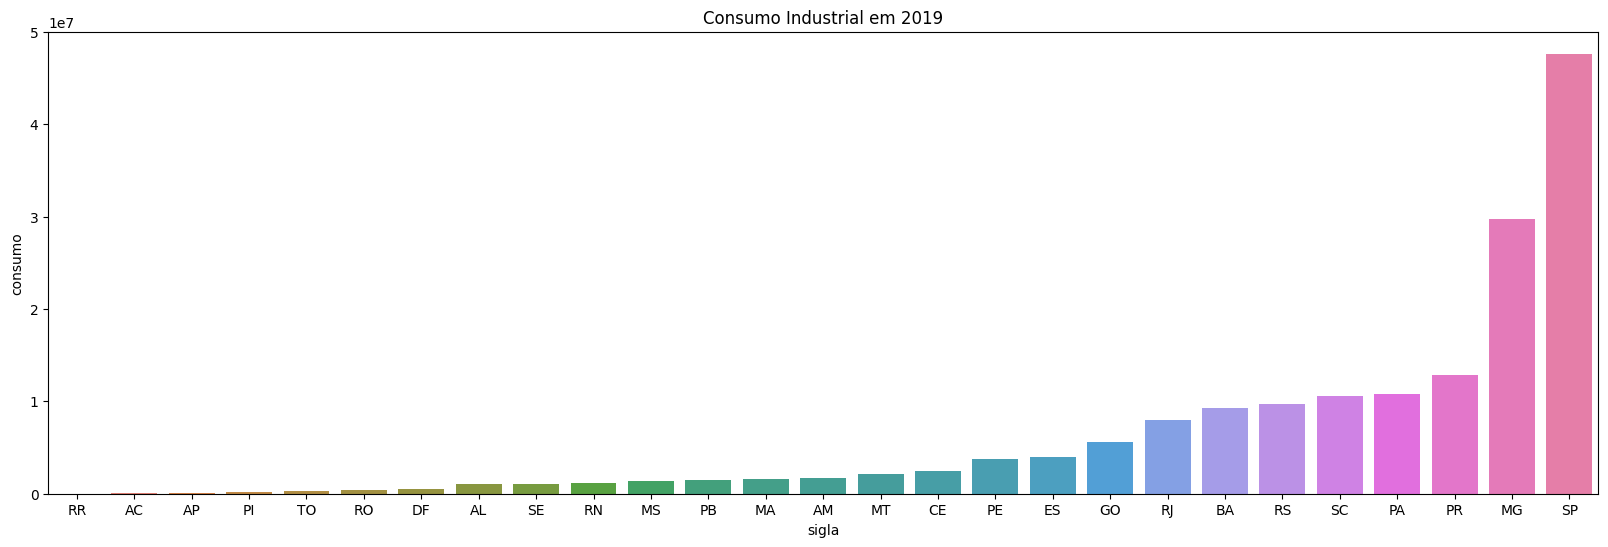

In [14]:
plt.figure(figsize=(20,6))
plt.title('Consumo Industrial em 2019')
sns.barplot(data=industrial_2019_data.to_frame(), x='sigla', y='consumo', hue='sigla')

Com base na interpretação do grafico gerado é possível concluir que o estado que apresentou o maior consumo de energia elétrica no setor Industrial no ano de 2019 é São Paulo

9. Gráfico de linhas onde o eixo X representa a os anos e o eixo Y representa o consumo de energia agrupados por tipo de consumo.

<Axes: title={'center': 'Ano X Consumo'}, xlabel='ano', ylabel='consumo'>

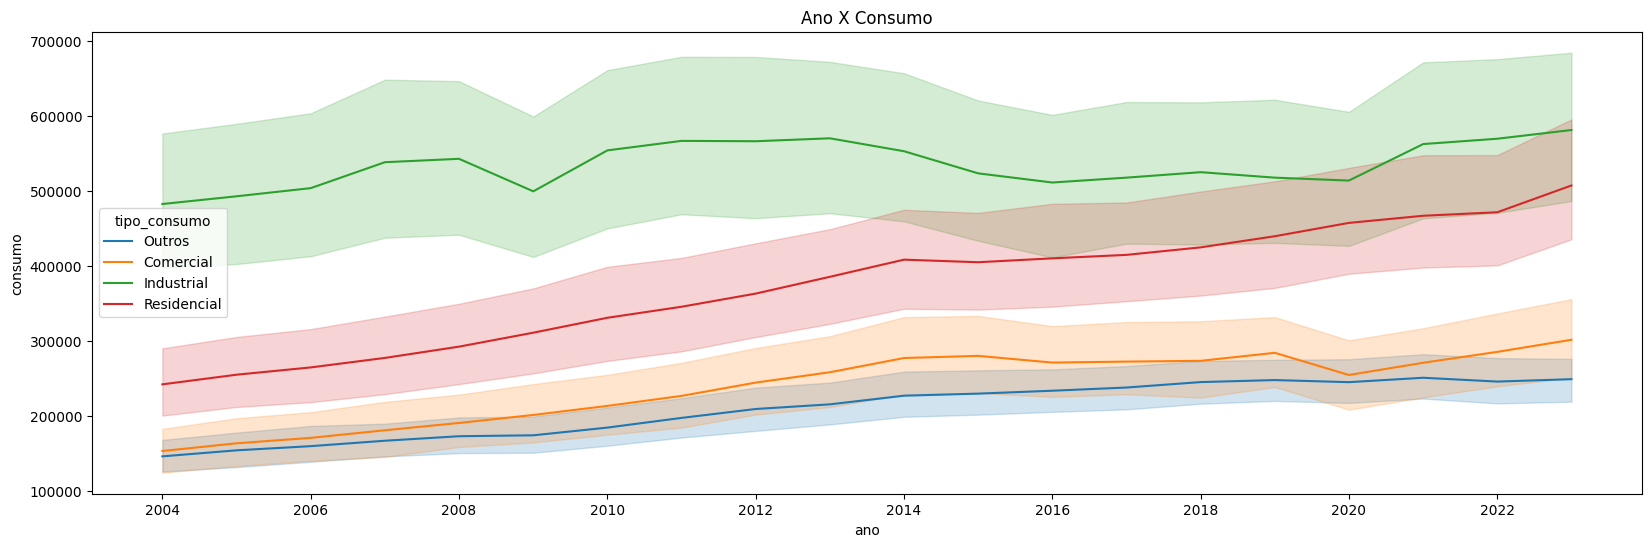

In [15]:
df_energy_insights['ano'] = pd.to_datetime(df_energy_insights['ano'],format= '%Y')
plt.figure(figsize=(20,6))
plt.title('Ano X Consumo')
sns.lineplot(data=df_energy_insights, x='ano', y='consumo', hue='tipo_consumo')

O gráfico acima permite a visualização da linha de tempo X consumo por categoria de cliente apontada na base de dados utilizada para este estudo.
Podemos visualizar o crescimento ao longo dos anos para a categoria de consumidores classificados como 'Residencial' enquanto a categoria 'Industrial' apresenta oscilação em seu consumo na mesma janela de observação.

10.Calcule a média de consumo agrupados por ano e região e em seguida responda: Em qual ano o consumo de energia elétrica da região Nordeste foi mais alto que o Centro Oeste? Escolha uma das alternativas abaixo.


In [16]:
reg_ano_cons = df_energy_insights.groupby(['regiao', 'ano'])['consumo'].mean().reset_index()
print(reg_ano_cons)



          regiao        ano        consumo
0   Centro-Oeste 2004-01-01  100102.505208
1   Centro-Oeste 2005-01-01  105432.052083
2   Centro-Oeste 2006-01-01  107769.401042
3   Centro-Oeste 2007-01-01  114746.552083
4   Centro-Oeste 2008-01-01  123189.578125
..           ...        ...            ...
95           Sul 2019-01-01  620978.277778
96           Sul 2020-01-01  615992.736111
97           Sul 2021-01-01  644170.312500
98           Sul 2022-01-01  657523.180556
99           Sul 2023-01-01  679563.777778

[100 rows x 3 columns]


In [17]:
filtro_Nordeste = (df_energy_insights['regiao']=='Nordeste')
df_filtro_Nordeste = df_energy_insights[filtro_Nordeste].groupby('ano')['consumo'].sum().reset_index().sort_values(by='consumo', ascending=False).head()
df_filtro_Nordeste.head()


,ano,consumo
19,2023-01-01,94838084.0
18,2022-01-01,88191888.0
17,2021-01-01,86917300.0
15,2019-01-01,83138412.0
16,2020-01-01,81169564.0


<Axes: xlabel='ano', ylabel='consumo'>

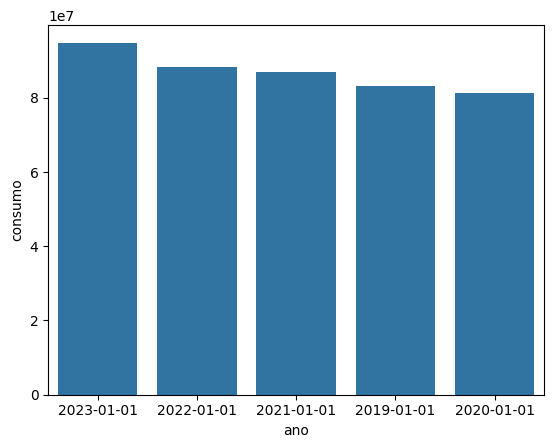

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_filtro_Nordeste, x='ano', y='consumo')

In [19]:
filtro_Centro_Oeste = (df_energy_insights['regiao']=='Centro-Oeste')
df_filtro_Centro_Oeste = df_energy_insights[filtro_Centro_Oeste].groupby('ano')['consumo'].sum().reset_index().sort_values(by='consumo', ascending=False).head()
df_filtro_Centro_Oeste.head()

,ano,consumo
19,2023-01-01,42656983.0
18,2022-01-01,40556675.0
17,2021-01-01,39842474.0
16,2020-01-01,38944228.0
15,2019-01-01,38418556.0


<Axes: xlabel='ano', ylabel='consumo'>

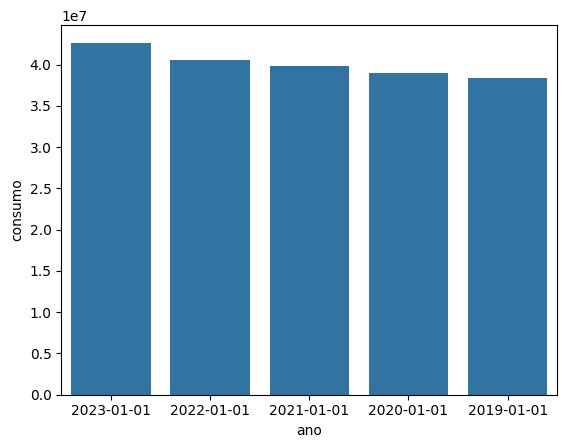

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_filtro_Centro_Oeste, x='ano', y='consumo')

Conforme análise dos dados, no ano de 2023, ambas as regiões 'Nordeste' e 'Centro-Oeste' tiveram seu maior consumo de energia elétrica dentro da base de dados estudada, porém, mesmo assim, pode-se observar que o consumo da região 'Nordeste' foi maior que a 'Centro-Oeste' .